<a href="https://colab.research.google.com/github/Khoval94/desafio-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Primero, se calculará el total de ventas de cada tienda y se presentarán los resultados en una tabla comparativa y una gráfica. La Tienda 4 es la que registra el menor total de ventas, mientras que la Tienda 1 es la que obtuvo el mayor volumen de ventas.

In [2]:
!pip install matplotlib


In [4]:
import matplotlib.pyplot as plt


In [13]:
resultados = []
# Sumar la columna 'Precio' para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
  suma_precio = tienda['Precio'].sum()
  resultados.append({'Tienda': nombre, 'Suma precio': suma_precio})




In [14]:
from __future__ import print_function
# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
print('\n')

     Tienda   Suma precio
0  Tienda_1  1.150880e+09
1  Tienda_2  1.116344e+09
2  Tienda_3  1.098020e+09
3  Tienda_4  1.038376e+09




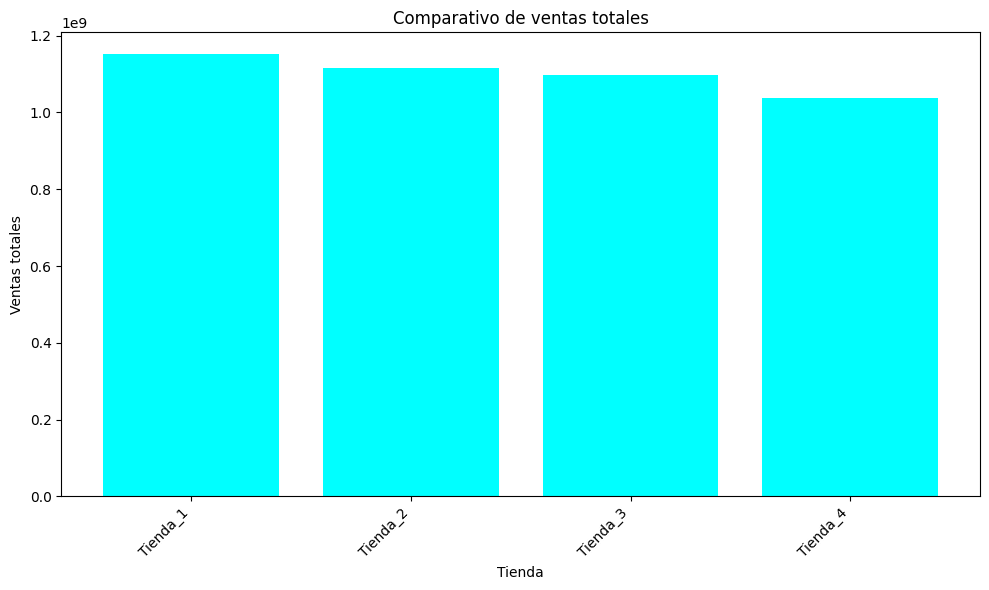

In [22]:
# Graficar comparativo de ventas

plt.figure(figsize=(10, 6))
plt.bar(df_resultados['Tienda'], df_resultados['Suma precio'], color= '#00FFFF')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales')
plt.title(f'Comparativo de ventas totales')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Se calculará el total de ventas por producto de cada tienda, y los resultados se presentarán en cuatro tablas. Podemos observar que las cuatro tiendas venden los artículos en un orden similar.

In [25]:
# Iterar sobre cada URL y generar una tabla para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
  df = pd.read_csv(url)
  suma_por_producto = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)
  print(f'Tabla generada para {nombre}:')
  print(suma_por_producto)
  print('\n')


Tabla generada para Tienda_1:
    Categoría del Producto       Precio
3             Electrónicos  409476100.0
2        Electrodomésticos  283260200.0
7                  Muebles  192528900.0
4   Instrumentos musicales   75102400.0
1     Deportes y diversión   33350100.0
5                 Juguetes   20262200.0
0  Artículos para el hogar   15074500.0
6                   Libros    9321300.0


Tabla generada para Tienda_2:
    Categoría del Producto       Precio
3             Electrónicos  410831100.0
2        Electrodomésticos  348567800.0
7                  Muebles  176426300.0
4   Instrumentos musicales  104990300.0
1     Deportes y diversión   34744500.0
5                 Juguetes   15945400.0
0  Artículos para el hogar   14746900.0
6                   Libros   10091200.0


Tabla generada para Tienda_3:
    Categoría del Producto       Precio
3             Electrónicos  410775800.0
2        Electrodomésticos  329237900.0
7                  Muebles  201072100.0
4   Instrumentos musicales

# 3. Calificación promedio de la tienda


Un factor importante a considerar es la satisfacción del cliente por tienda. En la tabla comparativa y en la gráfica, se observa que las tiendas con mejor calificación promedio son la Tienda 2 y la Tienda 3.

In [27]:
# Inicializar una lista para almacenar los resultados
calificaciones_promedio = []

In [28]:
# Iterar sobre cada URL y calcular la calificación promedio
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
  calificacion_promedio = tienda['Calificación'].mean()
  calificaciones_promedio.append({'Tienda': nombre, 'Calificación promedio': calificacion_promedio})

In [29]:
# Crear un DataFrame con los resultados
df_calificaciones_promedio = pd.DataFrame(calificaciones_promedio).sort_values(by='Calificación promedio', ascending=False)
print(df_calificaciones_promedio)

     Tienda  Calificación promedio
2  Tienda_3               4.048326
1  Tienda_2               4.037304
0  Tienda_1               3.995759
3  Tienda_4               3.995759


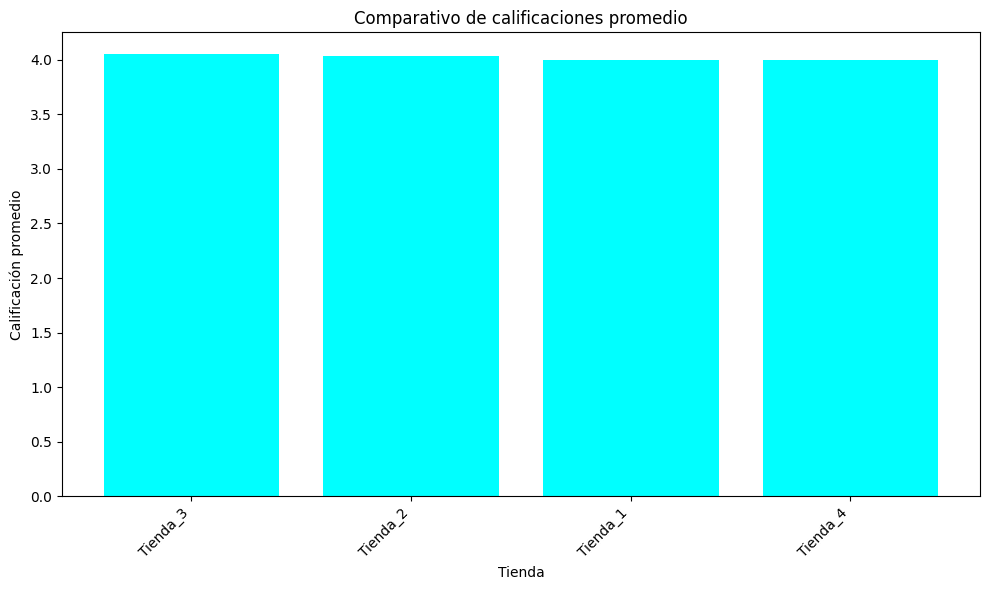

In [30]:
#Graficar comparativo de ventas
plt.figure(figsize=(10, 6))
plt.bar(df_calificaciones_promedio['Tienda'], df_calificaciones_promedio['Calificación promedio'], color= '#00FFFF')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.title(f'Comparativo de calificaciones promedio')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Se muestran los cinco productos más vendidos de cada tienda. Se observa que, en las cuatro tiendas, la mayoría de los productos destacados son electrónicos, ocupando los primeros puestos, mientras que los electrodomésticos se encuentran en posiciones secundarias. Cabe resaltar que únicamente la Tienda 3 tiene como producto más vendido al refrigerador.

Los cinco productos más vendidos en Tienda_1:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


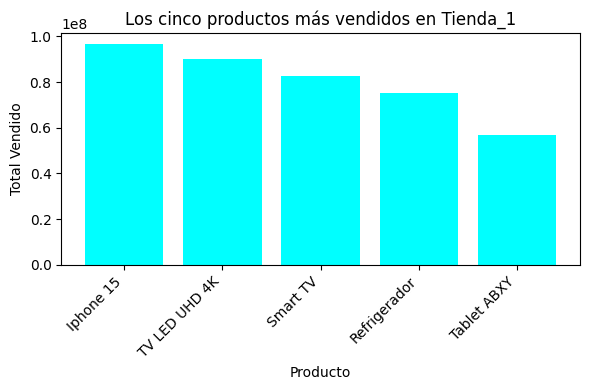



Los cinco productos más vendidos en Tienda_2:
           Producto       Precio
0         Iphone 15  113225800.0
1     TV LED UHD 4K  103375000.0
2      Refrigerador   97632500.0
3  Lavadora de ropa   66762300.0
4          Smart TV   61142000.0


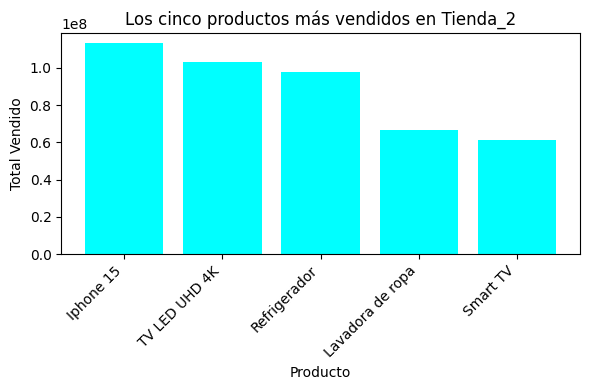



Los cinco productos más vendidos en Tienda_3:
        Producto      Precio
0   Refrigerador  99889700.0
1  TV LED UHD 4K  96669100.0
2      Iphone 15  93225700.0
3       Smart TV  78837300.0
4   Lavavajillas  64364800.0


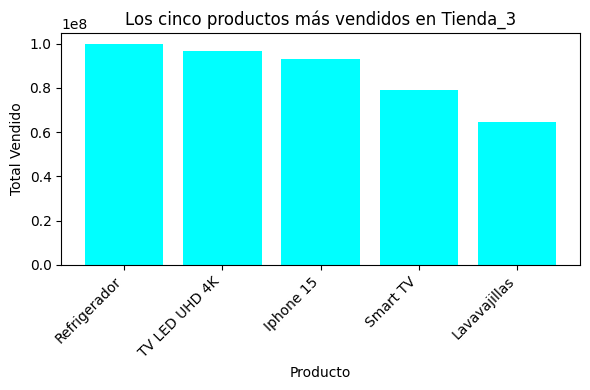



Los cinco productos más vendidos en Tienda_4:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


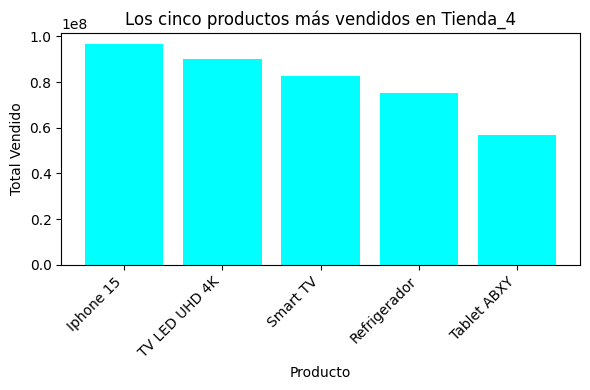

In [44]:
# Generar tablas y gráficas con los cinco artículos más vendidos de cada tienda

# Iterar sobre cada DataFrame y nombre de tienda
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
    # Agrupar por producto y sumar precios, luego seleccionar los 5 más vendidos
    productos_mas_vendidos = tienda_df.groupby('Producto')['Precio'].sum().nlargest(5).reset_index()

    # Mostrar tabla
    print(f'Los cinco productos más vendidos en {nombre}:')
    print(productos_mas_vendidos)

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.bar(productos_mas_vendidos['Producto'], productos_mas_vendidos['Precio'], color='#00FFFF')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido')
    plt.title(f'Los cinco productos más vendidos en {nombre}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')


Con los datos anteriores, podemos calcular qué porcentaje de las ventas totales representa el grupo de los cinco productos más vendidos en cada tienda. Observamos que, en las Tiendas 2 y 3, los productos top representan un mayor porcentaje de las ventas totales. La diferencia en este aspecto con respecto a las Tiendas 1 y 4 es de aproximadamente un punto porcentual.

In [45]:
# porcentaje de ventas de los top cinco productos

for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
    ventas_totales = tienda['Precio'].sum()
    productos_mas_vendidos = tienda.groupby('Producto')['Precio'].sum().nlargest(5)
    venta_top_5 = productos_mas_vendidos.sum()
    porcentaje_venta_top_5 = (venta_top_5 / ventas_totales) * 100
    print(f"En {nombre}, el top clinco de productos representa el {porcentaje_venta_top_5: .2f}% de las ventas totales. ")

En Tienda_1, el top clinco de productos representa el  38.69% de las ventas totales. 
En Tienda_2, el top clinco de productos representa el  39.61% de las ventas totales. 
En Tienda_3, el top clinco de productos representa el  39.43% de las ventas totales. 
En Tienda_4, el top clinco de productos representa el  38.69% de las ventas totales. 


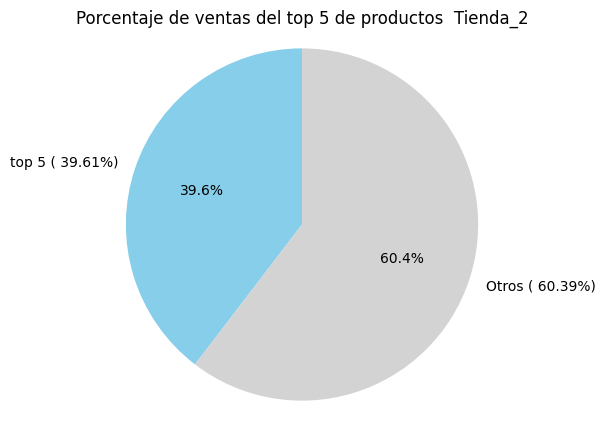

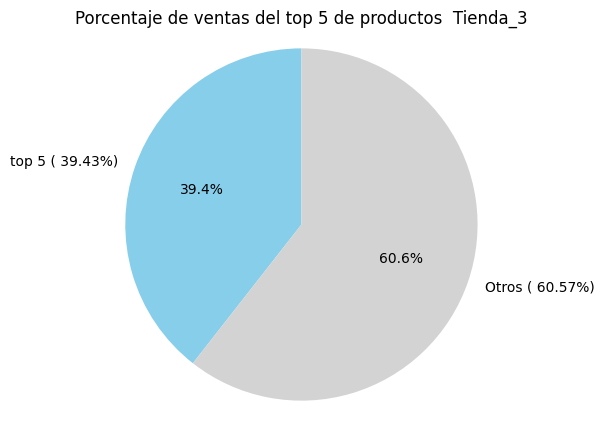

In [46]:
# generar gráfica de pie para las tiendas dos y tres
for tienda, nombre in zip([tienda2, tienda3], ['Tienda_2', 'Tienda_3']):
    ventas_totales = tienda['Precio'].sum()
    productos_mas_vendidos = tienda.groupby('Producto')['Precio'].sum().nlargest(5)
    venta_top_5 = productos_mas_vendidos.sum()
    porcentaje_venta_top_5 = (venta_top_5 / ventas_totales) * 100

    plt.figure(figsize=(5, 5))
    plt.pie([porcentaje_venta_top_5, 100 -porcentaje_venta_top_5],
            labels=[f'top 5 ({porcentaje_venta_top_5: .2f}%)',
                    f'Otros ({100 - porcentaje_venta_top_5: .2f}%)'],
            autopct='%1.1f%%',
            startangle=90,
            colors=['skyblue', 'lightgrey']
            )
    plt.title(f'Porcentaje de ventas del top 5 de productos  {nombre}')
    plt.axis('equal')
    plt.show()


Ahora comparamos los cinco productos menos vendidos de cada tienda.

Los cinco productos menos vendidos en Tienda_1:
                  Producto     Precio
0          Cubo mágico 8x8   640400.0
1           Dinosaurio Rex   795600.0
2       Cuerda para saltar   853800.0
3             Set de vasos  1210700.0
4  Bloques de construcción  1237200.0


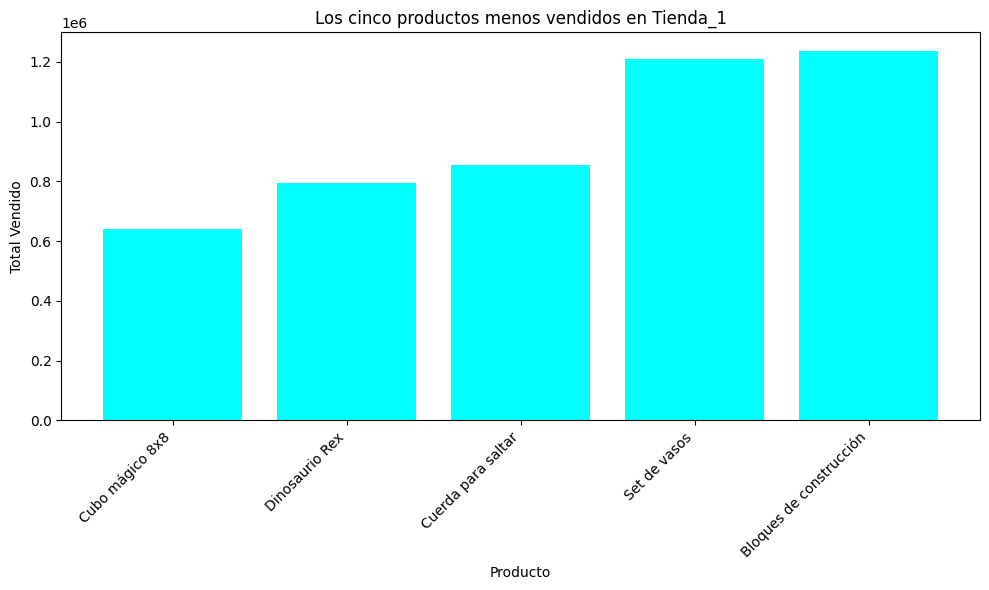





Los cinco productos menos vendidos en Tienda_2:
             Producto     Precio
0     Cubo mágico 8x8   643600.0
1      Dinosaurio Rex   770300.0
2  Cuerda para saltar   856900.0
3   Ajedrez de madera  1287700.0
4        Set de vasos  1542600.0


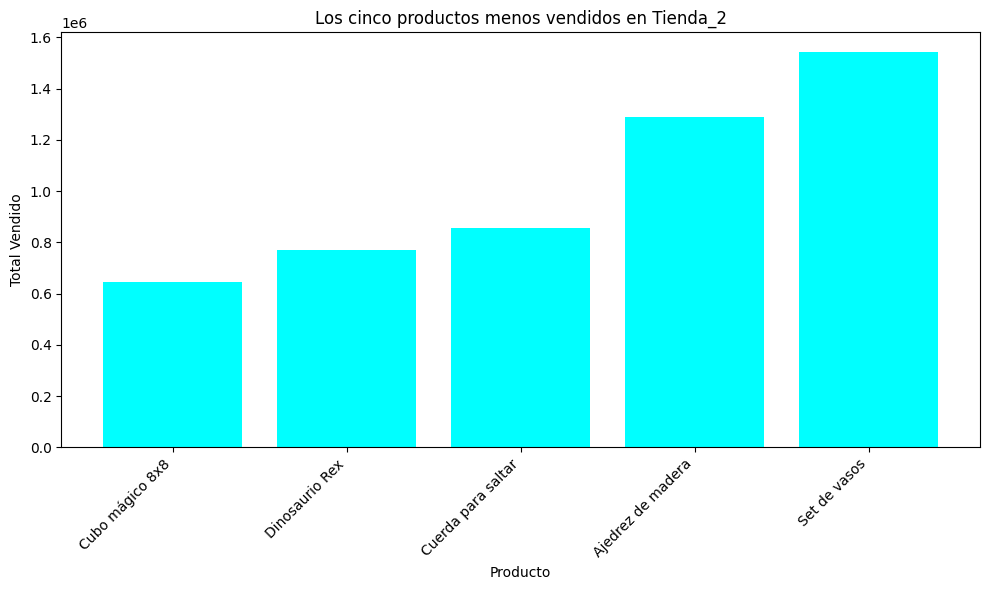





Los cinco productos menos vendidos en Tienda_3:
                  Producto     Precio
0          Cubo mágico 8x8   640400.0
1           Dinosaurio Rex   795600.0
2       Cuerda para saltar   853800.0
3             Set de vasos  1210700.0
4  Bloques de construcción  1237200.0


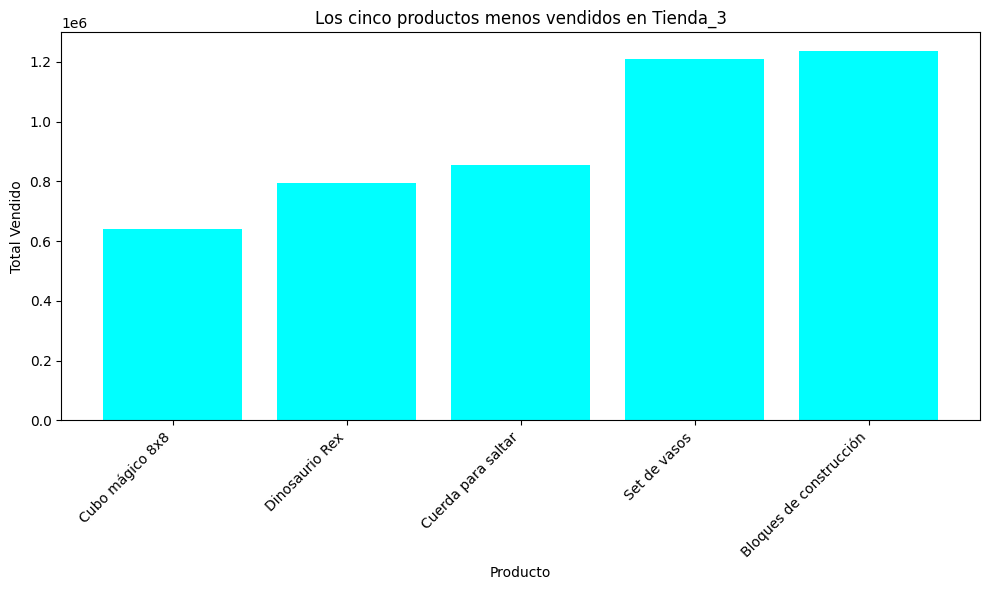





Los cinco productos menos vendidos en Tienda_4:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


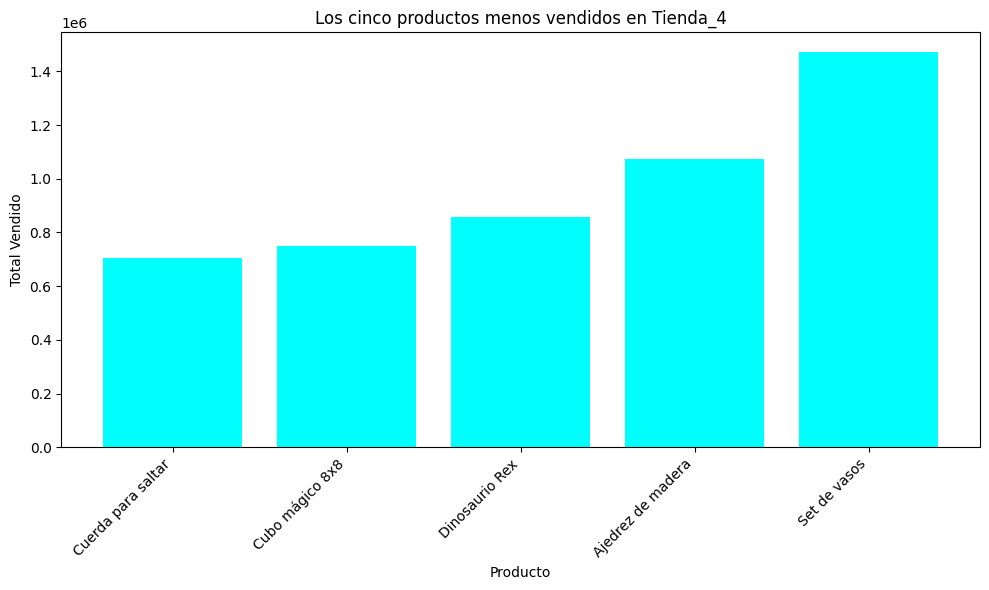

In [47]:
# Generar tablas y gráficas de los cinco productos menos vendidos de las tiendas
# Iterar sobre cada tienda y encontrar los cinco productos menos vendidos

for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
  df = pd.read_csv(url)
  bottom_5 = tienda.groupby('Producto')['Precio'].sum().nsmallest(5).reset_index()
  print(f'Los cinco productos menos vendidos en {nombre}:')
  print(bottom_5)
  plt.figure(figsize=(10, 6))
  plt.bar(bottom_5['Producto'], bottom_5['Precio'], color='#00FFFF')
  plt.xlabel('Producto')
  plt.ylabel('Total Vendido')
  plt.title(f'Los cinco productos menos vendidos en {nombre}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
  print('\n')
  print('\n')

# 5. Envío promedio por tienda

las tiendas dos y tres tienen los gastos promedio de envío más altos.

In [48]:
# Iniciar una lista para almacenar los resultados
envio_promedio = []

In [52]:
# Crear una lista para almacenar los resultados
envios_promedio = []

# Iterar sobre cada tienda
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
    envio_prom = tienda_df['Costo de envío'].mean()
    envios_promedio.append({'Tienda': nombre, 'Costo de Envío': envio_prom})

# Crear DataFrame con los resultados
df_envio_promedio = pd.DataFrame(envios_promedio).sort_values(by='Costo de Envío', ascending=False)

# Mostrar el resultado
print(df_envio_promedio)


     Tienda  Costo de Envío
1  Tienda_2    25216.235693
2  Tienda_3    24805.680373
0  Tienda_1    23459.457167
3  Tienda_4    23459.457167


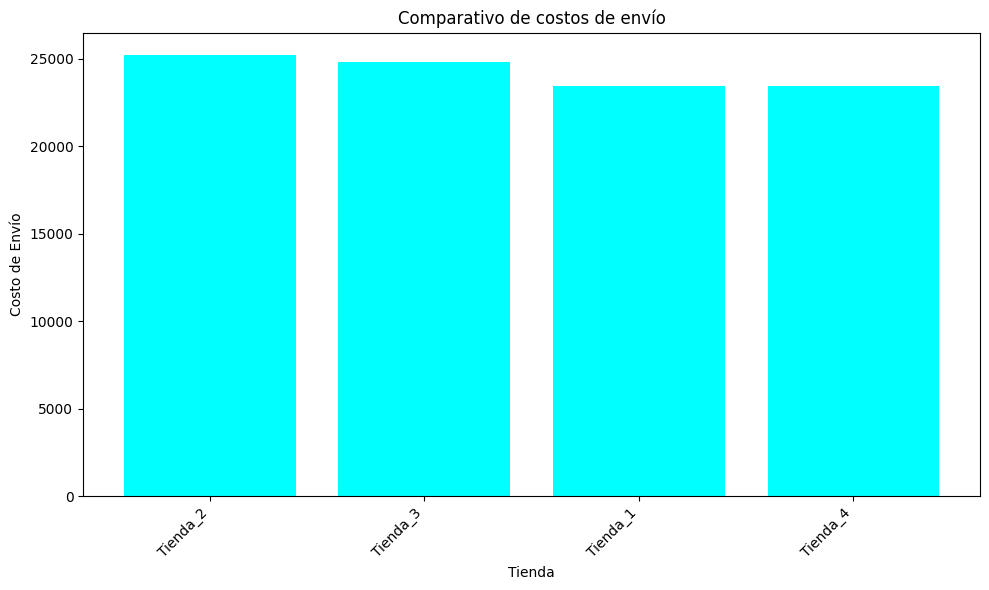

In [53]:
# Graficamos comparativo de costos de envío

plt.figure(figsize=(10, 6))
plt.bar(df_envio_promedio['Tienda'], df_envio_promedio['Costo de Envío'], color='#00FFFF')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío')
plt.title(f'Comparativo de costos de envío')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()


# Porcentaje de rentabilidad de cada tienda.


Con los datos anteriores, podemos calcular qué tan rentable es cada tienda, restando los gastos de envío de los ingresos totales y dividiendo el resultado entre los mismos gastos de envío. Observamos que las tiendas menos rentables, de acuerdo con este cálculo, son la Tienda 2 y la Tienda 3, siendo esta última la menos rentable de todas.

In [54]:
resultados_rentabilidad= []
#Calcular la rentabilidad para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']):
  ingresos_totales = tienda['Precio'].sum()
  gastos_envio = tienda['Costo de envío'].sum()
  rentabilidad = ((ingresos_totales - gastos_envio) / gastos_envio) * 100
  resultados_rentabilidad.append({'Tienda': nombre, 'Rentabilidad (%)': rentabilidad})

df_rentabilidad = pd.DataFrame(resultados_rentabilidad)
print(df_rentabilidad)

     Tienda  Rentabilidad (%)
0  Tienda_1       1777.123111
1  Tienda_2       1776.677521
2  Tienda_3       1776.424126
3  Tienda_4       1777.123111


# Conclusión

Para tomar una decisión fundamentada sobre cuál tienda cerrar, se analizaron datos clave de rentabilidad, características operativas y contexto adicional.

1. Rentabilidad (%)
La Tienda 3 presenta la menor rentabilidad (1776.42%), seguida muy de cerca por la Tienda 2 (1776.68%). Ambas se ubican por debajo de las Tiendas 1 y 4 en este indicador.

2. Factores clave adicionales
Zona geográfica:

Tienda 2: Alta concentración de ventas en una zona que no coincide con las áreas de mayor demanda general, lo cual puede limitar su crecimiento futuro.

Tienda 3: Ubicada en una zona geográfica similar a las tiendas más exitosas, lo que sugiere una mejor alineación con la demanda del mercado.

Diversificación de ventas:

La Tienda 2 tiene un mayor porcentaje de ventas concentradas en sus cinco productos más vendidos (39.61%), frente al 39.43% de la Tienda 3, lo que indica una mayor dependencia de pocos productos.

3. Otros indicadores relevantes

Indicador	                    Tienda 2	                             Tienda 3
Costo promedio de envío	      25,216.24	                             24,805.68
Calificación prom  Levemente superior a T 1 y 4 |	Levemente superior a T 1 y 4


Recomendación
Aunque la Tienda 3 es la menos rentable en términos porcentuales, su ubicación estratégica y una mejor diversificación en las ventas la hacen más sostenible a largo plazo.

Por el contrario, la Tienda 2, con una rentabilidad igualmente baja, enfrenta riesgos significativos relacionados con su localización geográfica, altos costos de envío y una mayor dependencia de pocos productos.

Por lo tanto, se recomienda cerrar la Tienda 2 si se prioriza la estabilidad y proyección futura sobre una diferencia mínima en rentabilidad actual.
